**What is Feature Selection?**
 
Feature selection is the process of choosing the most important features (variables) from a dataset to improve a machine learning model's performance and efficiency. Instead of using all the features, we select only the most relevant ones that contribute significantly to predictions.


**Why Do We Need Feature Selection?**

*1.Reduces Overfitting 📉*
 
    Too many irrelevant features can make a model complex and cause it to overfit the training data.
*2.Improves Model Performance 🚀*
 
    Selecting relevant features boosts accuracy and reduces unnecessary noise in the data.
*3.Reduces Training Time ⏳*
 
    Fewer features mean faster model training and lower computational cost.
*4.Enhances Interpretability 🔍*
 
    Helps in understanding which features actually impact predictions.

**Types of Feature Selection Methods**

<ins>*Type => Filter Methods:*</ins>
 
Method => Correlation, Chi-Square, Mutual Information.
 
Description => Rank features based on statistical tests.
 
<ins>*Type => Wrapper Methods:*</ins>
 
Method => Forward/Backward Selection, Recursive Feature Elimination (RFE)
 
Description => Train models with different feature subsets and select the best.
 
<ins>*Type => Embedded Methods*</ins>
 
Method =>Lasso Regression, Decision Trees
 
Description =>Feature selection is built into the model training process.
 

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.linear_model import Lasso
import seaborn as sns
import matplotlib.pyplot as plt


In [6]:
np.random.seed(42)
data=pd.DataFrame({
    'size':np.random.randint(1000,5000,100),#sq.feet
    'Bedrooms':np.random.randint(1,5,100),#no of bedrooms
    'Age':np.random.randint(1,50,100),#age of house
    'Price':np.random.randint(100000,500000,100)#House price
})

In [7]:
data.head()

,size,Bedrooms,Age,Price
0,4174,2,32,486393
1,4507,2,39,134754
2,1860,4,49,326814
3,2294,2,32,337714
4,2130,2,4,242483


# Filter Methods

**Correlation**

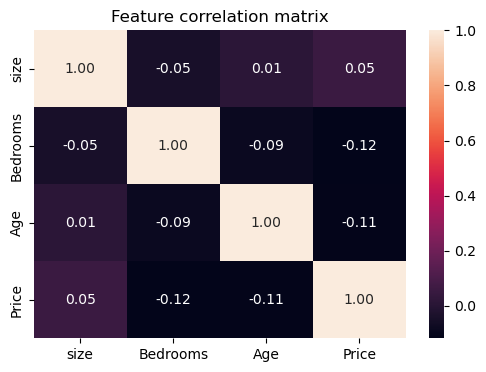

In [25]:
plt.figure(figsize=(6,4))
sns.heatmap(data.corr(),annot=True,cmap='rocket',fmt='.2f')
plt.title("Feature correlation matrix")
plt.show()

# Wrapper methods

**RFE**

In [21]:
X=data.drop(columns=['Price'])
y=data["Price"]
model=RandomForestRegressor()
rfe=RFE(model,n_features_to_select=2)
x_selected=rfe.fit_transform(x,y)
print("selected features using RFE:",X.columns[rfe.support_])


selected features using RFE: Index(['size', 'Age'], dtype='object')


In [22]:
lasso =Lasso(alpha=0.1)
lasso.fit(X, y)
importance = np.abs(lasso.coef_)
selected_features = X.columns[importance > 0]
print("Selected features using Lasso:", selected_features)

Selected features using Lasso: Index(['size', 'Bedrooms', 'Age'], dtype='object')


In [26]:
df=pd.DataFrame({'TransactionDate':pd.to_datetime(['2025-02-05 14:30:00','2025-02-06 18:45:00'])})
df['DayofWeek']=df['TransactionDate'].dt.dayofweek
df['Hour']=df['TransactionDate'].dt.hour
df['IsWeekend']=df['DayofWeek'].apply(lambda x:1 if x>=5 else 0)
print(df)

      TransactionDate  DayofWeek  Hour  IsWeekend
0 2025-02-05 14:30:00          2    14          0
1 2025-02-06 18:45:00          3    18          0


In [28]:
df_transactions=pd.DataFrame({
    'UserID':[101,102,101,103,102],
    'TransactionAmount':[500,300,700,1000,400]
})
df_transactions

,UserID,TransactionAmount
0,101,500
1,102,300
2,101,700
3,103,1000
4,102,400
